---
---
# **Correlation analysis**

---
---
# **Preprocessing**

In [ ]:
!wget https://perso.esiee.fr/~gueurett/LV_Research/Acoustic_Analysis_Results.csv
!wget https://perso.esiee.fr/~gueurett/LV_Research/Human_evaluation.csv

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import preprocessing
from keras import layers, initializers
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [4]:
data = pd.read_csv('Acoustic_Analysis_Results.csv', delimiter=',', dtype=None, encoding=None)
data = data.rename(columns={'Unnamed: 0': 'Filename'}) # rename the not-named column to the filename column

human_rating = pd.read_csv('Human_evaluation.csv', delimiter=',', dtype=None, encoding=None).to_numpy()

labels = np.zeros(shape=(human_rating.shape[0]))

for index, row in data.iterrows():
  if row['Filename'][0] == 'I': labels[index] = 1

data = data.drop(columns=['Filename'])
data = data.fillna(data.mean())

for column_name in data.columns:
  data[column_name] = (data[column_name] - np.mean(data[column_name])) / np.std(data[column_name])

data = data.to_numpy()

down_limit = 4
up_limit = 3
to_delete = []
for index in range(data.shape[0]):

  if labels[index] == 1 and human_rating[index, 1] < down_limit:
    to_delete.append(index)

  if labels[index] == 0 and human_rating[index, 1] > up_limit:
    to_delete.append(index)

print("to_delete:  ", to_delete)

data = np.delete(data, to_delete, axis=0)
labels = np.delete(labels, to_delete, axis=0)

nb_features = data.shape[1]
nb_samples  = data.shape[0]

rng     = np.random.default_rng() # shuffle time
shuffle = rng.choice(nb_samples, size=(nb_samples), replace=False)
data    = data[shuffle]
labels  = labels[shuffle]

print("-----------------------------")
print("|  data.shape:   ", data.shape, "|")
print("|  labels.shape: ", labels.shape, "   |")
print("-----------------------------")

to_delete:   [4, 6, 8, 17, 26, 42, 44, 56, 64, 81, 88, 104, 115, 116, 120, 123, 134, 135, 150, 159, 160, 166, 171, 172, 178, 193, 198]
-----------------------------
|  data.shape:    (173, 35) |
|  labels.shape:  (173,)    |
-----------------------------


In [5]:
spliter = 0.2
index = int(nb_samples * (1-spliter))

train_x = data[:index]
test_x  = data[index:]

train_y = labels[:index]
test_y  = labels[index:]

print("----------------------------------")
print("| train_x.shape: ", train_x.shape)
print("| train_y.shape : ", train_y.shape)
print("----------------------------------")
print("| test_x.shape: ", test_x.shape)
print("| test_y.shape : ", test_y.shape)
print("----------------------------------")

----------------------------------
| train_x.shape:  (138, 35)
| train_y.shape :  (138,)
----------------------------------
| test_x.shape:  (35, 35)
| test_y.shape :  (35,)
----------------------------------


---
---
# **Linear Regression**

0.3724563875596455
[ 2.28855086e-01  8.75344189e-02 -1.84595178e-01  9.44254966e-02
  2.48308715e-02  1.58656303e+00 -1.56934356e+00 -4.08712533e-02
 -1.97405720e-01 -1.15238457e-01  3.91710248e-02  1.20074321e-01
  3.30071417e-02 -1.51560831e-02 -5.12344705e-03  8.21591642e-02
 -2.15423356e-01 -2.28335396e-01  9.11029828e-02  9.04929299e-04
 -1.21128321e-01 -3.59656236e-01  4.70178304e-01 -4.89400086e-02
 -1.31021744e-01  1.46685016e-01  2.36324324e-02  1.74965028e-02
 -5.23678994e-02  6.37626706e-02  2.70703584e-02 -8.27316561e-02
  6.20166223e-02  9.77869140e-03 -1.01299255e-01]


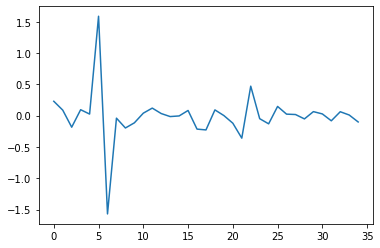

In [56]:
linreg = LinearRegression()

linreg.fit(train_x, train_y)
print(linreg.score(test_x, test_y))

print(linreg.coef_)
plt.plot(linreg.coef_);

---
---
# **SVR**

0.20428778017016647
[[ 0.28999958  0.02494814 -0.07166685  0.02600922  0.03186644  0.40433071
  -0.40717077 -0.03919045 -0.14568293 -0.10806339 -0.00419136  0.09473546
   0.05039185  0.00417824  0.00259279  0.01912014 -0.17685956 -0.18810986
   0.0762184  -0.01869078 -0.08252267 -0.24801987  0.34700505 -0.0485095
  -0.06841877  0.10375333  0.01224384  0.04975119 -0.04362904  0.06007713
   0.06966026 -0.06339499  0.05717811  0.01487746 -0.03413717]]


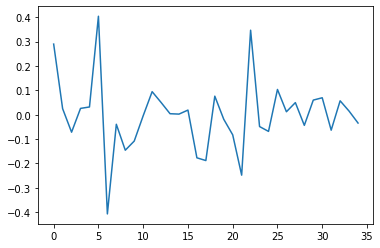

In [57]:
svm = SVR(kernel='linear')
svm.fit(train_x, train_y)

print(svm.score(test_x, test_y))
print(svm.coef_)
plt.plot(svm.coef_[0])

---
---
# **AdaBoostRegressor**

0.5338649527129
[0.04618032 0.02998614 0.01074004 0.0171116  0.026379   0.0478752
 0.03423406 0.05419904 0.08371826 0.02293888 0.03018826 0.01859871
 0.02594486 0.02980149 0.0185882  0.03174499 0.00788706 0.05167712
 0.0239375  0.00819722 0.01871725 0.02025842 0.05468514 0.01479406
 0.00246202 0.01132711 0.00569789 0.06138719 0.0132311  0.03996378
 0.03847972 0.0144419  0.01999524 0.02447447 0.04015676]


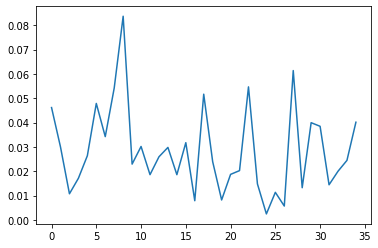

In [58]:
ada = AdaBoostRegressor(n_estimators=100, random_state=8)
ada.fit(train_x, train_y)

print(ada.score(test_x, test_y))

print(ada.feature_importances_)
plt.plot(ada.feature_importances_)

---
---
# **RandomForestClassifier**

0.3408703585182591
[0.035306   0.03081046 0.01878131 0.02673574 0.01946515 0.02163917
 0.02198191 0.0285567  0.03377283 0.02336232 0.01526973 0.02146669
 0.02088103 0.02649519 0.02375652 0.03271504 0.0210456  0.02991658
 0.02183763 0.01406355 0.02712596 0.0681288  0.07855917 0.02449015
 0.003042   0.00487985 0.00716743 0.03530487 0.02460329 0.03352142
 0.04964139 0.01759401 0.03733579 0.05619455 0.04455218]


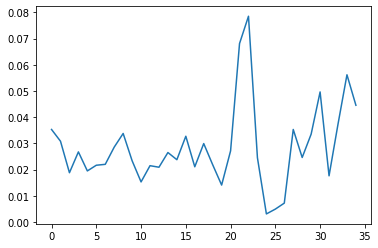

In [59]:
rfc = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', oob_score=True, random_state=8)
rfc.fit(data, labels)

print(rfc.oob_score_)
print(rfc.feature_importances_)
plt.plot(rfc.feature_importances_)

---
---
# **XGBoost**

In [69]:
model = XGBRegressor(use_label_encoder=False)
model.fit(train_x, train_y)

[18:37:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(use_label_encoder=False)

In [70]:
predictions = model.predict(test_x)

rmse = np.sqrt(MSE(test_y, predictions))
r2_score = r2(test_y, predictions)
print("RMSE : % f" %(rmse))
print("r2 : % f" %(r2_score))

RMSE :  0.307891
r2 :  0.494418


---
---
# **KNeighborsRegressor**



In [62]:
max = 0
for k in range(1,100):

  kneigh = KNeighborsRegressor(n_neighbors=k, leaf_size=50)
  kneigh.fit(train_x, train_y)
  score = kneigh.score(test_x, test_y)
  if score > max:
    print("for k =", k, "score=",score)
    max = score

for k = 3 score= 0.08831908831908841
for k = 4 score= 0.1923076923076923
for k = 5 score= 0.23282051282051264
for k = 6 score= 0.2507122507122507


---
---

# **Decision Tree Regressor**

In [63]:
tree = DecisionTreeRegressor(max_depth=1000, min_samples_split=5, min_samples_leaf=5, max_features='auto', random_state=8)
tree.fit(train_x, train_y)

print(tree.score(test_x, test_y))

0.24152276295133435


---
---

# **Neural Network**

In [35]:
def get_model():

  model = tf.keras.Sequential()

  model.add(layers.Dense(39))
  model.add(layers.ReLU())
  model.add(layers.Dropout(0.2))

  model.add(layers.Dense(1))

  optimizer = Adam(0.0001)

  model.compile(optimizer=optimizer, loss='mse')

  return model

In [36]:
model = get_model()

history = model.fit(train_x, train_y, validation_split=0.3, epochs=300, batch_size=2)

score = model.evaluate(test_x, test_y)
print("\n\nscore: ",score)

Epoch 1/300
48/48 [==============================] - 1s 11ms/step - loss: 1.0765 - val_loss: 1.2405
Epoch 2/300
48/48 [==============================] - 0s 5ms/step - loss: 0.9268 - val_loss: 1.1228
Epoch 3/300
48/48 [==============================] - 0s 8ms/step - loss: 1.4462 - val_loss: 1.0312
Epoch 4/300
48/48 [==============================] - 0s 6ms/step - loss: 1.2416 - val_loss: 0.9524
Epoch 5/300
48/48 [==============================] - 0s 6ms/step - loss: 0.8970 - val_loss: 0.8760
Epoch 6/300
48/48 [==============================] - 0s 6ms/step - loss: 1.2008 - val_loss: 0.8184
Epoch 7/300
48/48 [==============================] - 0s 5ms/step - loss: 0.9079 - val_loss: 0.7709
Epoch 8/300
48/48 [==============================] - 0s 6ms/step - loss: 0.8785 - val_loss: 0.7423
Epoch 9/300
48/48 [==============================] - 0s 5ms/step - loss: 1.0914 - val_loss: 0.6970
Epoch 10/300
48/48 [==============================] - 0s 5ms/step - loss: 0.9436 - val_loss: 0.6757
Epoch 11

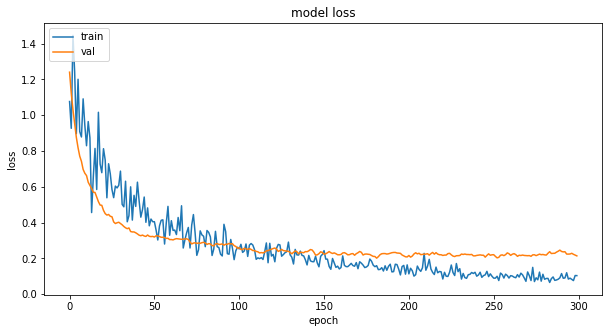

In [37]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()